In [3]:
%load_ext autoreload 
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Data classes

In [ ]:
from cbviz.cbviz.utils import DataNum

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

dn = DataNum(df, ncols=2)

In [ ]:
expected = np.repeat('floating', 1)
observed = df.apply(infer_dtype).values
type(expected)

In [ ]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

df2 = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})

In [ ]:
dn = DataNum(df2)

In [ ]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")

In [ ]:
expected = np.repeat('float', dn.ncols)
observed = np.array([all[col].dtype.name.rstrip('_12346') for col in all.columns])
all(expected == observed)

# KDE related 

## Split violin 

In [ ]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})

In [ ]:
len(data['s1'].astype('category').cat.categories)

In [ ]:
from cbviz.cbviz.KDE import SplitViolin

In [ ]:
sp = SplitViolin(data, s1_order=['WT', 'Balanced', 'Minor', 'Major'], s2_order=['Classical', 'Basal-like'])

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in sp.get_violins(colors=('cornflowerblue', 'salmon')):

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.5)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.5, c='k')

ax.set_yticks(*sp.get_s1_ticks())

# fig.savefig('./test/Test-SplitViolin.pdf')

## Ridge plot

In [ ]:
s1 = np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip(range(4) , (30, 80, 50, 30)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1})
data

In [ ]:
from cbviz.cbviz.KDE import Ridge

In [ ]:
rp = Ridge(data, s1_order=['WT','Balanced', 'Minor', 'Major'], scale_factor=0.8)

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in rp.get_kdes():

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.3)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.1, c='k')

ax.set_yticks(*rp.get_s1_ticks())
ax.set_xlabel(rp.ylabel)
[ax.axhline(i, ls=':', lw=0.25, c='0.15') for i in rp.get_s1_ticks()[0]]

# XYview

The base class implementing scatter plot, pearson correlation, a regression line and a line representing slope 1

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

In [ ]:
from cbviz.cbviz.xytools import XYview
from adjustText import adjust_text

In [ ]:
cond = df.index.isin(metabolites)
xv = XYview(df, highlight=metabolites, s=np.where(cond, 40, 10), c=np.where(cond, 'r', '.5'), alpha=1)

In [ ]:
!pip install adjustText

In [ ]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(xv.x, xv.y, **xv.scatter_kw)
xv.add_correlation(fontsize='small')
xv.add_reg_line(color='cornflowerblue', lw=1)
xv.label_dots(adjust=True, fontsize='small')
xv.label_xy()
fig.savefig('./test/Test-XYview.pdf')

# XYpairs

In [ ]:
from cbviz.cbviz.xytools import XYpairs

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)

In [58]:
np.ptp(all.values.ravel()) * 0.02

0.2963102771661459

In [ ]:
all = all.iloc[:, [1,0,3,2]]

In [ ]:
cond = all.index.isin(metabolites)
xp = XYpairs(all, lower_tri=False)

In [ ]:
plt.style.use('cviz')

fig = plt.figure(figsize=(5, 5))

gs = xp.add_gridspec(hspace=0.3, wspace=0.4)

pairs = xp.get_pairs(highlight=metabolites, s=np.where(cond, 40, 10), c=np.where(cond, 'r', '0.5'), alpha=np.where(cond, 1, 0.5))
for pair in pairs:
    ax = fig.add_subplot(gs[pair.position])
    ax.tick_params(labelsize='xx-small', pad=0)
    xv = pair.XYview
    ax.scatter(xv.x, xv.y, **xv.scatter_kw)
    xv.add_reg_line()
    xv.label_dots(adjust=True, fontsize='x-small')
    if pair.combo == ['FG_effect_sgNT', 'sgARNTL2_effect_FG']:
        xv.add_correlation(loc=1)
    else:
        xv.add_correlation(loc=4)
    xv.label_xy(fontsize='x-small', outer=True)

# XYzoom

In [159]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

In [160]:
from cbviz.cbviz.xytools import XYzoom

In [182]:
xz = XYzoom(df, ('min', 0), ('min', 0))

In [183]:
top5 = xz.zoom_data.mean(1).nsmallest(5).index.to_list()
cond = xz.data.df.index.isin(top5)

In [185]:
top5

['L-Cystine',
 'Cysteine',
 'gamma-Aminobutyric acid',
 'L-Canavanine',
 'N-Acetyl-alpha-D-glucosamine 1-phosphate']

<AxesSubplot:xlabel='FG_effect_sgARNTL2', ylabel='sgARNTL2_effect_FG'>

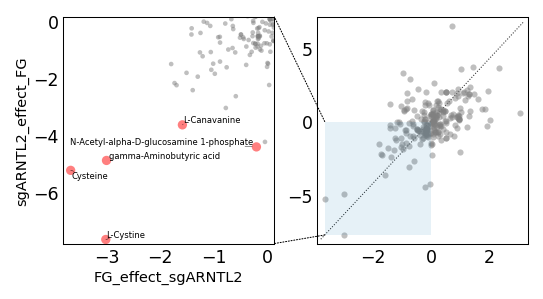

In [198]:
plt.style.use('cviz')

xz = XYzoom(df, ('min', 0), ('min', 0))

top5 = xz.zoom_data.mean(1).nsmallest(5).index.to_list()
cond = xz.data.df.index.isin(top5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))

ax2.scatter(xz.x, xz.y, **xz.scatter_kw)
xz.add_xy_line(ax2)
xz.add_rect(ax=ax2)
ax1.scatter(xz.x, xz.y, s=np.where(cond, 20, 5), c=np.where(cond, 'r', '.5'), alpha=0.5, linewidths=0)
xz.connect(ax2, ax1, 'left', lw=0.5, ls=':')
xz.label_xy(ax=ax1, outer=False, fontsize='x-small')
xz.label_dots(top5, ax=ax1, adjust=True, adjust_kwargs={'arrowprops':{'arrowstyle':'-', 'lw':0.2}}, fontsize=4)

In [39]:
from itertools import product

In [43]:
[(x, y) for x in [xz.xrange.min] for y in xz.yrange]

[(0, 1), (0, 6.490183007173922)]